In [97]:
import pandas as pd
import numpy as np

DATA_PATH = "/Users/mvonebers/HUBBS-Lab/data/"
actiwave_data = pd.read_excel(DATA_PATH + "actiwave_TEST.xlsx")
audio_data = pd.read_excel(DATA_PATH + "audio_TEST.xlsx")
e4_data = pd.read_excel(DATA_PATH + "E4_TEST.xlsx")
change_data = pd.read_excel(DATA_PATH + "normalized_change.xlsx")

e4_data = e4_data.replace(0, np.NaN)
e4_data.dropna(inplace=True)
change_data = change_data.replace(0, np.NaN)
change_data.dropna(inplace=True)
audio_data = audio_data.replace(0, np.NaN)
audio_data.dropna(inplace=True)
actiwave_data = actiwave_data.replace(0, np.NaN)
actiwave_data.dropna(inplace=True)

#e4_data = pd.concat([e4_data, change_data.reindex(e4_data.index)], axis=1)

e4_data.insert(0, "person", [0] * e4_data.shape[0])
e4_data.insert(1, "trial", [0] * e4_data.shape[0])

for i, row in e4_data.iterrows():
    e4_data.at[i, "person"] = int(e4_data.at[i, "id"][7:])
    e4_data.at[i, "trial"] = int(e4_data.at[i, "id"][5])
    
e4_data = e4_data.drop(columns=['id'])
e4_data = e4_data.rename(columns={"person": "id"})

"""
Combine the data with the normalized changes per person.
"""

e4_data = pd.merge(e4_data, change_data, on='id')

def combine_with_results(df):
    for label,_ in change_data.items():
        if label == "id":
            continue
        df[label] = [0] * df.shape[0]
        
    for change_row in change_data.iterrows():
        #mask = int(df.id[7]) == change_row.id
        for label,i in zip(change_data.items(), range(len(change_row))):
            df.loc[int(df.id[7]) == change_row.id, label] = change_row[i]
        
    
#combine_with_results(e4_data)
e4_data

,id,trial,EDA_PPT,HR_PPT,TEMP_PPT,BVP_PPT,ACC_PPT,IBI_PPT,EDA_FREQ_PPT,EDA_AMP_PPT,Brief fear of Negative Evaluation,CAI Trait Dyadic Score,CAI Trait Full Score,CAI Trait Public Speaking Score,CAI Trait Small group Score,STAI Trait Score,CAI State Score,STAI State Score
0,4,1,0.205970,82.376250,31.404085,0.013278,64.812218,0.882853,7.181628,0.012059,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
1,4,2,0.206435,105.666378,31.331652,-0.132812,65.118669,0.859414,7.312119,0.012054,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
2,4,3,0.212655,75.010328,30.183614,-0.111220,64.876459,0.921917,7.685270,0.012726,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
3,4,4,0.191278,92.559115,29.766569,-0.046831,64.844329,1.171929,6.262231,0.010277,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
4,4,5,0.154794,79.935382,29.652207,0.029759,62.817997,1.187555,2.574713,0.010306,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
5,4,6,0.131103,69.976339,28.489687,-0.001057,63.517451,0.927365,0.536913,0.012226,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
6,4,7,0.221141,72.407584,27.779962,0.002222,63.135293,0.834022,0.551724,0.031166,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
7,4,8,0.235911,70.961925,27.479961,0.039489,63.190300,0.808073,1.120623,0.008137,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
8,5,1,1.398084,92.092074,32.617098,-0.001293,65.803129,0.610225,11.653179,0.144946,0.388889,0.166667,0.121212,0.100000,0.090909,0.025641,0.300000,0.090909
9,5,2,0.475566,84.963252,32.318491,-0.054704,65.578315,0.714732,5.871560,0.070066,0.388889,0.166667,0.121212,0.100000,0.090909,0.025641,0.300000,0.090909


In [ ]:
def assign_results(data):
    

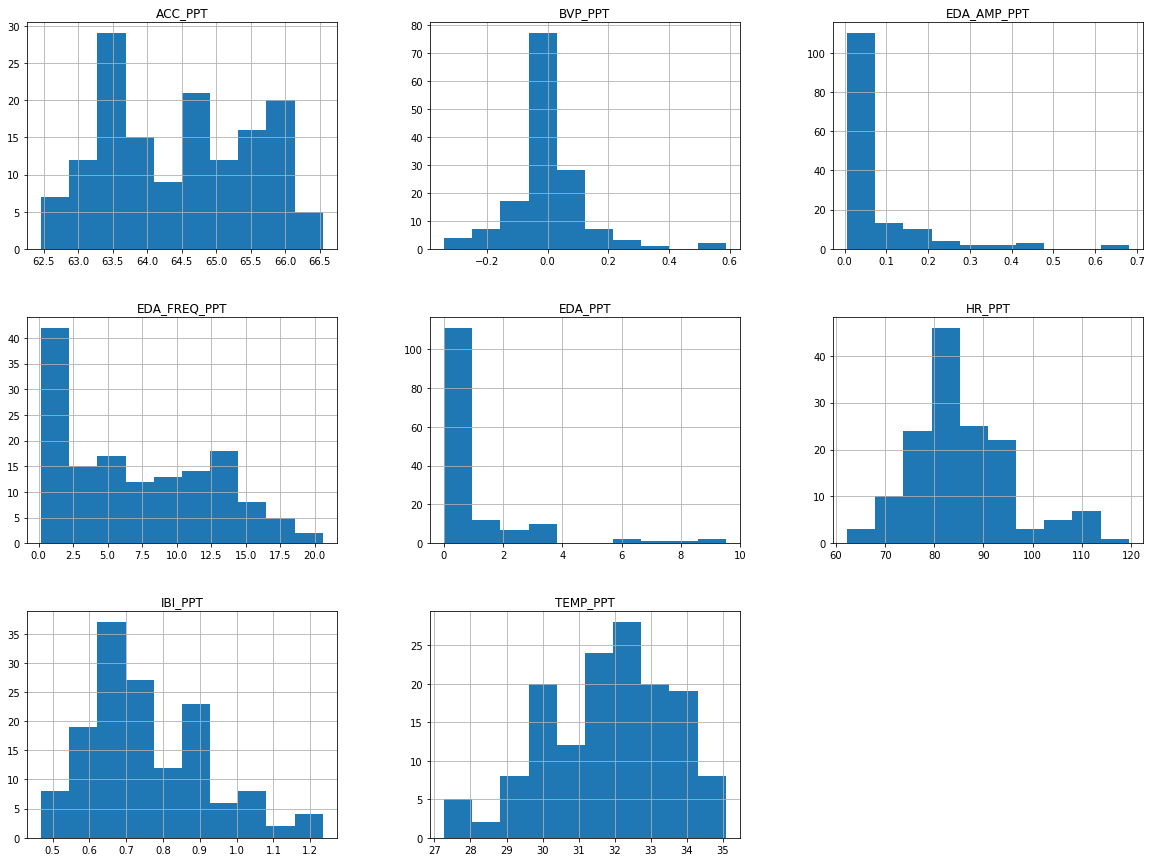

In [18]:
import matplotlib.pyplot as plt

e4_data.hist(bins=10, figsize=(20,15))
plt.show()

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
